In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계 함수)에<br>
    적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [2]:
data_pv = pd.read_pickle('./dataset/df2.pkl')
data_pv.head()

,0,1,2,3,4
0,C1,C2,C3,C4,C5
1,0,1,2,3,4
2,5,6,7,8,9


In [3]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [14]:
pdf1 = pd.pivot_table(df,
                     index = 'class', # 행 위치에 들어갈 열
                     columns = 'sex', # 열 위치에 들어갈 열
                     values = 'age', # 데이터로 사용할 열
                     aggfunc = 'mean' # 데이터 집계 함수
                     )
display(pdf1.head())

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [13]:
pdf2 = pd.pivot_table(df,
                     index = 'class', # 행 위치에 들어갈 열
                     columns = 'sex', # 열 위치에 들어갈 열
                     values = 'survived', # 데이터로 사용할 열
                     aggfunc = ['mean','sum'] # 데이터 집계 함수
                     )
display(pdf2.head())
# survived는 1이고 그걸 합쳤으면 결국 산 사람 명 수 됨
# 생존자 퍼센티지를 냈으니 그건 결국 생존율

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [12]:
pdf3 = pd.pivot_table(df,
                     index = ['class','sex'], # 행 위치에 들어갈 열
                     columns = 'survived', # 열 위치에 들어갈 열
                     values = ['age','fare'], # 데이터로 사용할 열
                     aggfunc = ['mean','max'] # 데이터 집계 함수
                     )
display(pdf3.head()) # 멀티 출력도 가능하다!

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [39]:
# [연습문제] titanic 데이터에 대하여 피벗을 사용하여 의미 있는 탐색을 수행하고 인사이트를 기술하세요.
# 나.. 30대 여성.. 돈이 없으니 2등석을 샀다... 과연 내가 살아남을 수 있을까?

pdf4 = pd.pivot_table(df,
                     index = ['class','sex'], # 행 위치에 들어갈 열
                     columns = 'survived', # 열 위치에 들어갈 열
                     values = ['age','survived'], # 데이터로 사용할 열
                     aggfunc = ['mean','max'] # 데이터 집계 함수
                     )
display(pdf4.head()) # 응 나 죽음 ㅠㅠㅋㅋㅋ

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [33]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])
pdf.head()


mean                                                   sum  \
age_cat           Adult      Baby Child   Elderly  Teenager Young_adult Adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       Baby Child Elderly Teenager Young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

### 시계열 데이터
- df의 행 인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp,<br>
    두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면<br>
    문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [4]:
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [5]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info() # datetime64 타입의 칼럼 하나 생성됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [6]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head() # object 타입이었던 Date 컬럼을 제거하고 datetime 타입의 새 인덱스를 넣었다

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [7]:
df1 = df1.reset_index()
df1.head() # 인덱스 작업했던 거 치우고 new_Date는 컬럼의 일환으로 속성이 바뀜

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [8]:
# 연도만 뽑아 새 컬럼으로 넣기
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018


In [9]:
# [연습문제] 월만 뽑아 넣은거, 월/일 뽑아 넣은 거 넣기
df1 = df.copy()
df1['Month'] = df1.new_Date.dt.month
df1['MD'] = df1.new_Date.dt.to_period(freq='M') # 날짜랑 일자만 같이 뽑는 건 어떻게..?
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Month,MD
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,6,2018-06


In [13]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1 = df.copy()
df1['Date_m'] = df1.new_Date.dt.to_period(freq="M")
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018-06


In [115]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Date_m
new_Date,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018-06


In [116]:
df_y = df1.loc['2018-6']
df_y.head()

,Close,Start,High,Low,Volume,Date_m
new_Date,,,,,,
2018-06-29,10700,10550,10900,9990,170253,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018-06
2018-06-25,11150,11400,11450,11000,55519,2018-06


In [117]:
df_d = df1.loc['2018-06-27',['Start','High']]
df_d

,Start,High
new_Date,,
2018-06-27,10800,11050


In [118]:
# 특정일로부터 며칠이 지났는지를 표현하고 싶다면?
# 날짜 간격
endday= pd.to_datetime('2018-12-25')
df1['timedelta'] = endday - df1.index
df1.set_index('timedelta',inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Date_m
timedelta,,,,,,
176 days,10100,10850,10900,10000,137977,2018-07
179 days,10700,10550,10900,9990,170253,2018-06
180 days,10400,10900,10950,10150,155769,2018-06
181 days,10900,10800,11050,10500,133548,2018-06
182 days,10800,10900,11000,10700,63039,2018-06


In [17]:
# 시계열 데이터 만들기

ts_ms = pd.date_range(start = '2019-01-01',
                     end = None, # 끝이 없지만 간격을 입력했기 때문에 간격에 맞게 종결됨
                     periods = 12, # 12번 간격으로
                     freq = '4M',# Month Start, 매월 시작일
                     tz = 'Asia/Seoul') # time 
pd.DataFrame(np.arange(12).reshape(-1,1), index = ts_ms)

# freq: MS 월초, M 월말, 3M 3개월 월말

,0
2019-01-31,0
2019-05-31,1
2019-09-30,2
2020-01-31,3
2020-05-31,4
2020-09-30,5
2021-01-31,6
2021-05-31,7
2021-09-30,8
2022-01-31,9


In [129]:
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Date_m,index
timedelta,,,,,,,
176 days,10100,10850,10900,10000,137977,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018-06,2019-05-01 00:00:00+09:00


In [131]:
df_a['Month'] = df_a['index'].dt.month # 밑에 index 컬럼에서 월만 뽑아오기
df_a.head()

,Close,Start,High,Low,Volume,Date_m,index,Month
timedelta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018-07,2019-01-01 00:00:00+09:00,1
179 days,10700,10550,10900,9990,170253,2018-06,2019-02-01 00:00:00+09:00,2
180 days,10400,10900,10950,10150,155769,2018-06,2019-03-01 00:00:00+09:00,3
181 days,10900,10800,11050,10500,133548,2018-06,2019-04-01 00:00:00+09:00,4
182 days,10800,10900,11000,10700,63039,2018-06,2019-05-01 00:00:00+09:00,5


In [134]:
#df_a.set_index('Month',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,Date_m,index
Month,,,,,,,
1,10100,10850,10900,10000,137977,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

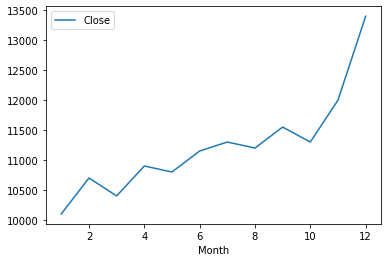

In [127]:
df_g = df_a[['Close']]
df_g.plot()

,Month,Close,Start,High,Low,Volume,Date_m
index,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018-06


<AxesSubplot:xlabel='index'>

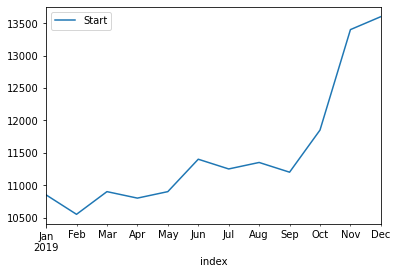

In [140]:
# 인덱스를 바꿔도 구 인덱스가 컬럼으로서 존재하게 하려면

df_a = df_a.reset_index() # 인덱스 자리에 있던 Month가 컬럼으로 돌아가고
df_a = df_a.set_index('index') # 뒤에 있던 'index' 컬럼을 인덱스로 재배치
display(df_a.head())
df_a[['Start']].plot()

In [141]:
df_sorted = df_a.sort_index(ascending=False) # 내림차순
df_sorted.head()

,Month,Close,Start,High,Low,Volume,Date_m
index,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018-06


In [142]:
# 칼럼의 값을 기준으로 sort하려면?
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()
# 원칙대로 써 주는 게 에러 났을 때 찾기도 편하고 좋다~

,Month,Close,Start,High,Low,Volume,Date_m
index,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018-06


In [155]:
# Period 배열
# date_range 말고 다른 걸 해볼까?

pr_m = pd.period_range(start='2019-01-01',
                      end = '2019-12-31',
                      periods = None,
                      freq = 'M')
print(pr_m)
# end랑 period 둘 중에 하나는 None으로 둬야 함
# start, end, period 셋 중 2개만 지정해 주고 나머진 얘가 계산하더라고
pr_h = pd.period_range(start='2019-01-01',
                      end = None,
                      periods = 3,
                      freq = '3H')
pr_h

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 03:00', '2019-01-01 06:00'], dtype='period[3H]')

날짜 관련한 거 의외로 까다롭고 또 잘 까먹으니까 자주자주 써서 안 까먹도록 노력합시다

python, numpy, pandas 날짜 타입 비교 및 정리<br>
https://ellun.tistory.com/320<br>
<br>
<img src="시간타입.png" width=500px>


1642396213.4083118 <class 'float'>


In [166]:
# (파이썬) timestamp를 string으로 변환해 봅시다.
import time
today = time.time()
print(today, type(today)) # 1980년 1월 1일 이후부터 현재까지의 초를 실수 형태로 나타냈음
s = str(today)
print(s, type(s))

1642396282.7839432 <class 'float'>
1642396282.7839432 <class 'str'>


In [169]:
# (파이썬) datetime을 string으로 변환해 봅시다.
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # string for time
print(s,type(s)) # YmdHMS 대소문자 유의하기

2022-01-17 14:14:07 <class 'str'>


In [188]:
# (파이썬) string을 timestamp로 변환하기
# 밑의 두 예제를 합치면 이게 됨(str->datetime->timestamp)
from datetime import datetime
import time
s = '2022-01-17 14:14:14'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
# make time, string passing time
print(ts,type(ts))

1642396454.0 <class 'float'>


In [190]:
# (파이썬) string을 datetime으로 변환하기
s = '2022-01-17 14:14:14'
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S') # string passing time
print(dt,type(dt))

2022-01-17 14:14:14 <class 'datetime.datetime'>


In [186]:
# (파이썬) datetime을 timestamp로 변환하기
print(datetime.now(), type(datetime.now()))
ts = time.mktime(datetime.now().timetuple()) # timetuple 까먹지 말아라~~~
print(ts,type(ts)) # make time

2022-01-17 14:22:00.930984 <class 'datetime.datetime'>
1642396920.0 <class 'float'>


In [206]:
# 1년 전 datetime 값
import datetime
import time
datetime_now = datetime.datetime.now()
delta_datetime = datetime.timedelta(days=-365) # 365일 전
print(delta_datetime)
datetime_now+delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 43, 51, 223192)

In [210]:
# 두 날짜 간의 일수 구하기
import datetime # 이거 하면 밑에처럼 datetime을 일일이 써줘야 하긴 하는데
# 대신 함수마다 임포트해 줄 필요 없어서 편함

since_timestamp = datetime.datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [212]:
# 특정 요일 구하기

def get_days(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]
get_days(2022,1,17) # 월요일부터 인덱스 0~6까지. 주말은 5,6이다!
# datetime.date(y,m,d).weekday()
# 이 함수 자체가 월 = 0, 화 = 1, 이런 식임

'MON'

In [220]:
# (판다스)
t = pd.Timestamp(15133355,unit='s',tz='US/Pacific')
print(t,type(t))

1970-06-24 20:42:35-07:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [221]:
today = time.time()
today

1642399758.2234962

In [223]:
date = pd.Timestamp(1642399758.2234962,unit='s',tz = 'Asia/Seoul')
print(date,type(date))

2022-01-17 15:09:18.223496199+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [224]:
# 특정 날짜를 기준으로 며칠 간의 날짜를 만들어 보
pd.to_datetime([1,2,3],unit='D',origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [226]:
pr_m = pd.period_range(start='2019-01-01',end=None,periods=3,freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [232]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01',periods=10,freq="D"))
# end가 None 이면 생략해도 됨
sr1 = pd.Series(np.random.randint(1000,2000,10),name="Price")
sr2 = pd.Series((np.random.rand(10)*100).round(2),name="Profit")
df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,0,Price,Profit
0,2021-01-01,1672,48.18
1,2021-01-02,1278,30.62
2,2021-01-03,1983,18.83
3,2021-01-04,1148,15.40
4,2021-01-05,1507,94.18


In [246]:
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [254]:
# [연습문제] datetime64 자료형으로 변환한 후 년, 월, 일로 분리하고
# year를 인덱스로 세팅하여 출력하세요.
df1 = df.copy()
df1['일시'] = pd.to_datetime(df1['연월일'])
df1['연'] = df1['일시'].dt.year
df1['월'] = df1['일시'].dt.month
df1['일'] = df1['일시'].dt.day
df1 = df1.set_index(df1['연'])
df1 = df1.drop(['연월일'],axis=1)
df1.head()


,당일종가,전일종가,시가,고가,저가,거래량,일시,연,월,일
연,,,,,,,,,,
2018,10100,600,10850,10900,10000,137977,2018-07-02,2018,7,2
2018,10700,300,10550,10900,9990,170253,2018-06-29,2018,6,29
2018,10400,500,10900,10950,10150,155769,2018-06-28,2018,6,28
2018,10900,100,10800,11050,10500,133548,2018-06-27,2018,6,27
2018,10800,350,10900,11000,10700,63039,2018-06-26,2018,6,26


In [255]:
# [연습문제] 불러운 데이터프레임을 datetime64 자료형으로 변환한 후
# period로 변환하고 년 월 일 표기 변경하여 년 월을 인덱스로 세팅하여 출력
df2 = df.copy()
df2['일시'] = pd.to_datetime(df2['연월일'])
df2['월별'] = df2['일시'].dt.to_period(freq='M')
df2 = df2.set_index(df2['월별'])
df2 = df2.drop(['연월일'],axis=1)
df2.head()

,당일종가,전일종가,시가,고가,저가,거래량,일시,월별
월별,,,,,,,,
2018-07,10100,600,10850,10900,10000,137977,2018-07-02,2018-07
2018-06,10700,300,10550,10900,9990,170253,2018-06-29,2018-06
2018-06,10400,500,10900,10950,10150,155769,2018-06-28,2018-06
2018-06,10900,100,10800,11050,10500,133548,2018-06-27,2018-06
2018-06,10800,350,10900,11000,10700,63039,2018-06-26,2018-06


In [5]:
# [과제]
import datetime, time
# str -> datetime
s = '2013-12-24 13:12:24'
dt = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

# timestamp -> str -> datetime
tm = time.time()
stm = str(tm)
print(stm,type(stm))
dtm = datetime.datetime.fromtimestamp(float(stm))
print(dtm,type(dtm))

# datetime -> str -> timestamp
st = str(dt)
print(st,type(st))
tst = time.mktime(datetime.datetime.strptime(st,'%Y-%m-%d %H:%M:%S').timetuple())
print(tst,type(tst))

2013-12-24 13:12:24 <class 'datetime.datetime'>
1642464997.6867938 <class 'str'>
2022-01-18 09:16:37.686794 <class 'datetime.datetime'>
2013-12-24 13:12:24 <class 'str'>
1387858344.0 <class 'float'>


실수 형태 타임스탬프를 연월일 형태의 데이트타임으로 바꿀 때<br>
datetime.datetime.fromtimestamp(타임스탬프)<br>
<br>
연월일 형태의 문자열을 데이트타임으로 바꿀 때<br>
datetime.datetime.strptime(str,%Y-%m-%d %H:%M:%S.%f')<br>
보면 맨 끝에 .%f 있는데, 이게 연월일 형태의 문자열을 데이트타임으로 변환할 때<br>
소수점 처리까지 같이 해주는 것임. 혹시 오류나면 시도해 보길 바람.<br>
이거 많이 헷갈리기 때문에 자주자주 해보고 손에 익혀야 함. 많이 틀리는 문제<br>

In [7]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고
# 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요
df = pd.read_csv('./dataset/auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고
# 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요
# 마일 퍼 갤런을 킬로미터 퍼 리터 로 고치라는 얘기임
# 2.3521458로 나눠주면 됨
df['kpl'] = round(df.mpg/2.3521458,2)
df[['mpg','kpl']].head(3)

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65


In [35]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요
# (자료형 타입이 문자로 되어 있는 이유 및 float로 처리)

print(df[['horsepower']].info())
def digit(a):
    return a.isdigit()
display(df[df['horsepower'].apply(digit)==False]) # 지금 이거 6개가 값이 ?(문자)라서 그런 듯
print(df.loc[df['horsepower'].apply(digit)==False,'horsepower'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,10.63
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,8.93
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,17.39
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,10.03
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,14.67
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,9.78


32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object


In [36]:
df1 = df.copy()
# 6개의 값을 nan으로 변경함
df1.loc[df1['horsepower'].apply(digit)==False,'horsepower'] = np.nan
# nan으로 변경하고 나면 astype 먹힘
df1['horsepower'] = df1['horsepower'].astype(float)
df1[['horsepower']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [29]:
# 손창효님 풀이
import numpy as np
df1 = df.copy()
#df1.horsepower = df1.horsepower.replace('?',np.nan)
sr1 = pd.to_numeric(df1.horsepower, errors = 'coerce')
# coerce 라는 명령 자체가 에러를 nan값으로 바꿔준다는 거라
# replace랑 중복 명령이라 리플레이스 지워줘도 된다는 것임
# 그 후에 컬럼 타입까지 object에서 float로 바꿔주기까지 함. 넘나 편하죠~
df1['horsepower'] = sr1
df1.info()

print(df1.horsepower.isnull().sum())
#df_sorted = df1.sort_values(by='horsepower',ascending=False)
#df_sorted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 31.2+ KB
6


In [37]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 nan 값의 개수를
# 처리 전 후로 비교하세요.
# 숫자로 적혀있는데 왜 문자형인가? - 6개 값이 '?'로 돼 있음
# np.nan으로 바꿔서 해보라는데...? - np.nan으로 변경 후 타입 전환 가능해짐
# 숫자가 아닌 것이 있었기 때문에 오브젝트 취급 되어버리는 것임

# 처리 전 df
print(df[['horsepower']].isnull().sum())
# 처리 후 df1
print(df1[['horsepower']].isnull().sum())
# 삭제해 주세요 (난 왜케 인플레이스랑 안 친하냐 정말 내 서타일이 아니다)
df2 = df1.dropna(subset=['horsepower'],axis=0)
print(df2[['horsepower']].isnull().sum())

horsepower    0
dtype: int64
horsepower    6
dtype: int64
horsepower    0
dtype: int64


In [321]:
# [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.
auto_df = df1.copy()
auto_df.to_pickle('./dataset/auto_df.pkl')
adf = pd.read_pickle('./dataset/auto_df.pkl')
adf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.23


In [329]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.
#max, abs
auto_df = df1.copy()
hmax = abs(max(adf['horsepower'])) # 230.0, float
auto_df['horsepower'] = round(auto_df['horsepower']/hmax,3)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,0.565,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,0.717,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,0.652,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,0.652,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,0.609,3449,10.5,70,1,ford torino,7.23


In [38]:
auto_df = df1.copy()
auto_df.horsepower = auto_df.horsepower.agg(lambda x : x/abs(max(x)))
display(auto_df.horsepower.head())
auto_df.head()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,0.565217,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,0.717391,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,0.652174,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,0.652174,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,0.608696,3449,10.5,70,1,ford torino,7.23


In [347]:
# [과제] horsepower의 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자,
# 해당 열의 최대값-최소값을 분모로 계산하여 저장하세요.
auto_df = df1.copy()
def minmax(a):
    return a.max()-a.min()
minimum = auto_df[['horsepower']].apply(min)
maxmin = auto_df[['horsepower']].apply(minmax)
print(minimum) # 46.0
print(maxmin) # 184.0

auto_df['결과'] = round((auto_df[['horsepower']]-minimum)/maxmin,3)
auto_df.head()

horsepower    46.0
dtype: float64
horsepower    184.0
dtype: float64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,결과
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.65,0.457
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.38,0.647
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.65,0.565
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.80,0.565
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.23,0.511


In [350]:
# [과제] origin열의 고유값을 출력하세요.
# unique
auto_df = df1.copy()
auto_df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [47]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요.
# (1: 'USA',2:'EU',3:'JPN')
auto_df[['origin']] = auto_df[['origin']].replace([1,2,3],['USA','EU','JPN'])
auto_df['origin'].replace({1:'USA',2:'E213U',3:'JPN'},inplace=True)# 로 해도 쌉가능
print(auto_df['origin'].unique())
auto_df.origin.tail(10)

['USA' 'JPN' 'EU']


388    USA
389    USA
390    JPN
391    USA
392    USA
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, dtype: object

### 범주형(category)와 문자열(object)의 차이
- 범주형은 상대적으로 규모가 작고 순서가 있음<br>

    예를 들어, {1:'C',2:'A',3:'B'}라는 카테고리가 있으면<br>
    
    이걸 정렬하면 ABC가 아니라 CAB가 됨. 순서가 있기 때문에.<br>
    
    문자열은 정렬하면 ABC가 되겠지?<br>
    
- 아침을 먹었는가의 여부는 카테고리로,<br>

    아침 메뉴의 종류는 문자열로 한다는 느낌의 차이

In [372]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)로 변환하여 출력하세요.
auto_df[['origin']].info() # 아까 위에서 안 바꿨으면 int64였음
adf = auto_df.copy()
adf[['origin']] = adf[['origin']].astype('category')
adf[['origin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   origin  398 non-null    category
dtypes: category(1)
memory usage: 658.0 bytes


In [374]:
# [과제] origin 열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.
adf[['origin']].info() # 카테고리
adf[['origin']] = adf[['origin']].astype('object') # str 써도 됨
adf[['origin']].info() # 오브젝트

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   origin  398 non-null    category
dtypes: category(1)
memory usage: 658.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [51]:
# [과제] horsepower를 3개의 bin으로 나누고
# bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔
import matplotlib.pyplot as plt

auto_df = df1.copy()
auto_df = auto_df.dropna(subset=['horsepower'])
bin_names = ['저출력','보통출력','고출력']
auto_df[['horsepower']].min() # 46
auto_df[['horsepower']].max() # 230
# 46과 230 사이를 3등분하면 46~107.33~168.67~230 구간이 됨
result, makebin = np.histogram(auto_df['horsepower'],bins=3)
# np.histogram은 두 가지의 값을 반환함.
# 첫 번째는 히스토그램의 값, 두 번째는 빈의 경계선
# 우리가 수기로 계산한 주석의 내용은 두 번째 반환값에 들어 있다.
display(result,makebin)
# cut 함수: [데이터, 구간(개수), 레이블 명]
auto_df['출력'] = pd.cut(auto_df['horsepower'],
                      bins = makebin, # 이거 3으로 해도 결과 똑같음
                      labels = bin_names,  # 구간 나눈 것들의 이름
                      include_lowest=True) # 첫 경계값 포함
display(auto_df[['출력']].head(10))

array([257, 103,  32], dtype=int64)

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

,출력
0,보통출력
1,보통출력
2,보통출력
3,보통출력
4,보통출력
5,고출력
6,고출력
7,고출력
8,고출력
9,고출력


정규화 라는 개념부터 짚고 가야 함<br>
각 요소가 가진 상대적인 크기를 비교할 수 있게끔 만드는 게 정규화임<br>
주로 아래와 같은 방식으로 정규화 한다<br>
- 각 요소값/요소의 최댓값의 절대값
- 각 요소값-요소의 최솟값/요소의 최댓값-최솟값 (MinMaxScaler의 로직)<br>

익숙한 것 같다면 맞음. 위에서 했던 것들임.<br>
<br>
정규화 과정을 거치고 나면
- 상대적인 비율이기 때문에 서로간 크기를 비교할 수 있음
- 절대값이 가장 큰 것으로 연산하기 때문에 범위는 0\~1 또는 -1\~1
- 1 또는 -1은 반드시 1개는 존재함. 절대값이 가장 큰 값 그 자신이 존재하기 때문에.
<br>
<img src='정규화.png'>

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


,horsepower
count,392.000000
mean,0.454215
std,0.167353
min,0.200000
25%,0.326087
50%,0.406522
75%,0.547826
max,1.000000


<AxesSubplot:ylabel='Density'>

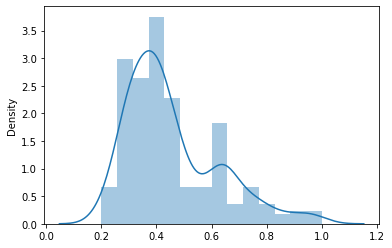

In [415]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후
# 통계요약표를 출력하세요


auto_df = df1.copy()
hmax = abs(max(auto_df['horsepower']))
def div(a):
    global hmax
    return a/hmax
display(auto_df[['horsepower']].describe())   # 정규화 전
display(auto_df[['horsepower']].apply(div).describe()) # 정규화 후
# 정규화를 거쳤기 때문에 max는 1이 될 수밖에 없다.
# 정규화 후 그래프가 어디로 치우쳤는지도 볼 수 있음. 왼쪽(낮은 값)으로 많이 치우쳐 있겠지?
sns.distplot(auto_df[['horsepower']].apply(div)) # 정답입니당~